## Visualizing data in python

In this exercise we will use the [nilearn](https://nilearn.github.io) package to visualize neuroimaging data.

In [1]:
import os
import collections
import xml.etree.ElementTree as ET

import nibabel
from nilearn import plotting
import matplotlib.pyplot as plt
%matplotlib inline

/Users/poldrack/anaconda3/envs/py3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


For this exercise we will be using some of the data files from the FSL distribution as well as some other files downloaded from neurovault.

In [3]:
FSLDIR='.' # os.environ['FSLDIR']
print(FSLDIR)

T1file=os.path.join(FSLDIR,'data/standard/MNI152_T1_2mm_brain.nii.gz')
statmap='data/neurovault/nv304.nii.gz'
tractfile=os.path.join(FSLDIR,'data/atlases/JHU/JHU-ICBM-tracts-prob-2mm.nii.gz')


.


First, plot the anatomical image using the ```plot_anat``` function from nilearn.plotting.

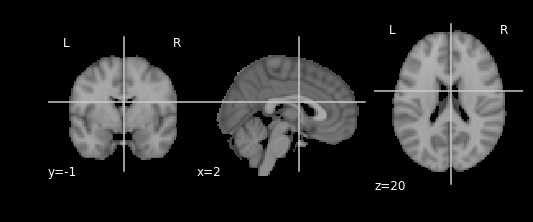

In [4]:
plotting.plot_anat(T1file)

**Problem 1**: Plot the statistical map from our example (which we loaded above into the variable ```statmap```) overlaid on the T1-weighted anatomical image, using the appropriate plotting command from nilearn.plotting.  Threshold the statistical image at Z=3.  The result should look like this:

![Solution](Problem1_solution.png "Intended solution for Problem 1")


In [ ]:
# INSERT SOLUTION HERE


# Loading FSL atlases

Now let's load the white matter atlas from FSL and display it using the ```prob_atlas``` function from nilearn.plotting.

/Users/poldrack/anaconda3/envs/py3/lib/python3.6/site-packages/matplotlib/contour.py:920: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')
/Users/poldrack/anaconda3/envs/py3/lib/python3.6/site-packages/numpy/ma/core.py:2784: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


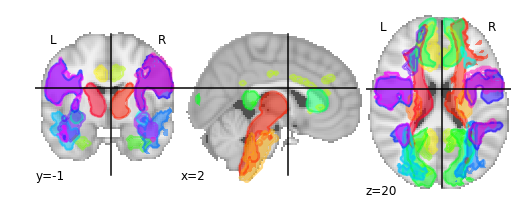

In [5]:
p=plotting.plot_prob_atlas(tractfile)


Plotting all 20 of the tracts at once is not very helpful, so let's focus in on a specific tract.  First we need to load the metadata file so that we can find out which image is associated with which tract.  

In [6]:
def get_atlas_metadata(atlasfile):
    """
    function to load metadata from FSL atlas
    """
    tree=ET.parse(atlasfile)
    md=collections.OrderedDict()
    for i in tree.iter():
        if 'index' in i.attrib:
            md[int(i.attrib['index'])]=i.text
    return md

# load the tract image and data/metadata

tractimg=nibabel.load(tractfile)
tractdata=tractimg.get_data()
jhu_metadata_file=os.path.join(FSLDIR,'data/atlases/JHU-tracts.xml')
jhu_md=get_atlas_metadata(jhu_metadata_file)


**Problem 2**: Loop through each of the regions in the metadata variable ```jhu_md``` and print the tract number followed by the name of the structure.  The output should look like this:

```
0 Anterior thalamic radiation L

1 Anterior thalamic radiation R

2 Corticospinal tract L

3 Corticospinal tract R
...
```

and so on for all of the tracts

In [ ]:
# INSERT SOLUTION HERE


**Problem 3**: Now let's loop through and display each of these tracts using a "glass brain" projection.  The code snippet below does some of the work - you need to fill in the blanks as noted in the comments.  Here is an example of what the output should look like for the first tract:

![Solution](Problem3_solution.png "Intended solution for Problem 3")

In [ ]:
# loop through and display each tract as a glass brain
for i in jhu_md:
    # create temporary 3d Nifti image for each tract
    td=tractdata[:,:,:,i]
    ti=nibabel.Nifti1Image(td,affine=tractimg.affine)
    
    # plot the image as a "glass brain" using nilearn.plotting with the title as shown in the example above
    # INSERT PLOTTING FUNCTION HERE
